In [20]:
import skimage
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
import os
from skimage import morphology
from skimage.measure import label, regionprops

In [21]:
def get_segmentation(img):
    orig_img = img.copy()
    img = img.mean(2)
    img = img > threshold_otsu(img)
    img = img == False
    img = morphology.remove_small_objects(img, 1000)
    img = morphology.remove_small_holes(img, 5000)
    labels = label(img)
    center = tuple(np.array(img.shape) // 2)
    center_patch = labels == labels[center[0], center[1]]
    removed = orig_img
    removed[img == False] = 0
    return removed

In [22]:
file_paths = os.listdir('../data/images/')
file_paths.sort()
imgs = [skimage.io.imread('../data/images/' + path) for path in file_paths]

## Test on one image

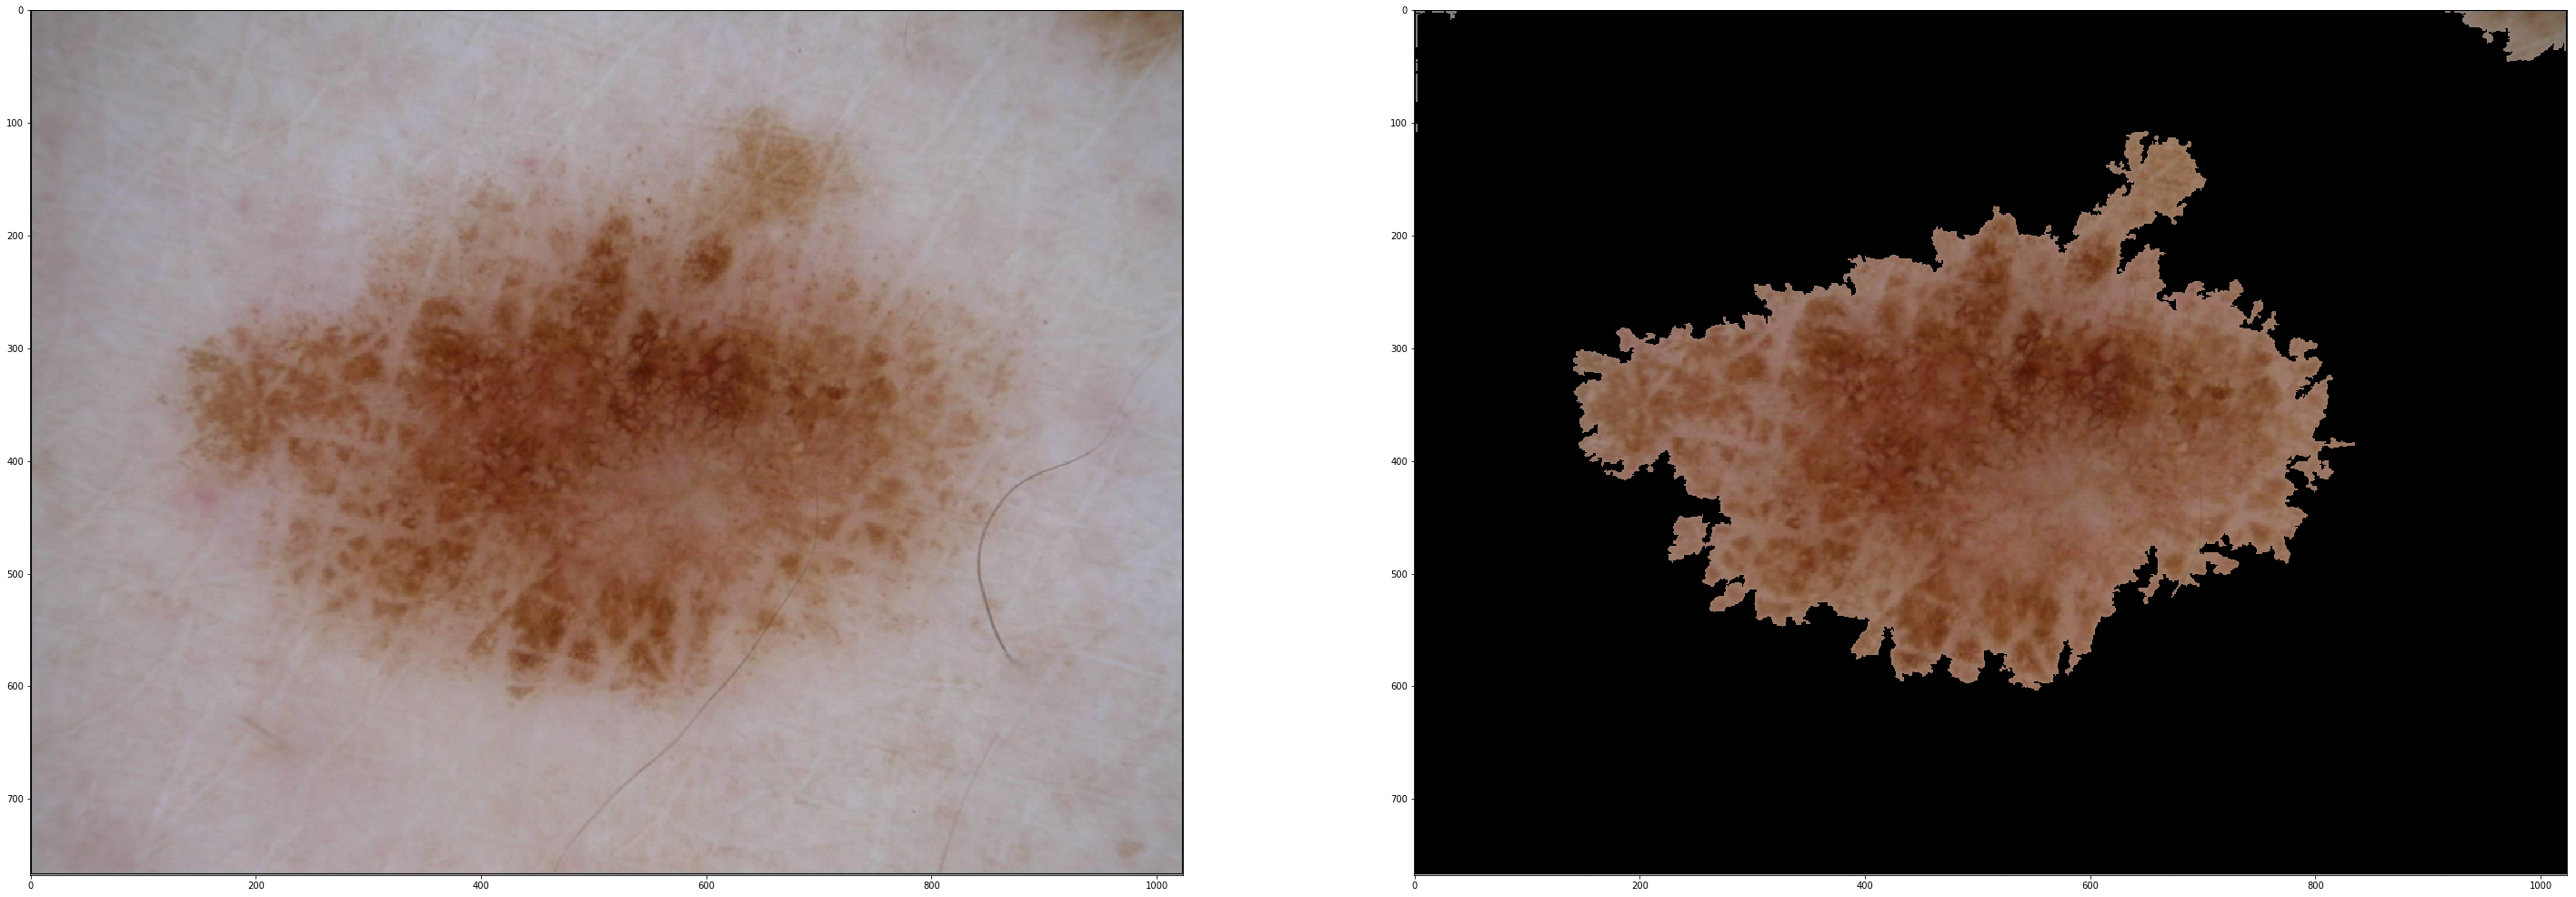

In [23]:
orig_img = imgs[21]
removed = get_segmentation(orig_img.copy())

plt.figure(0,figsize=(50, 50))
plt.subplot(121)
plt.imshow(orig_img)
plt.subplot(122)
plt.imshow(removed)

## Test on all images

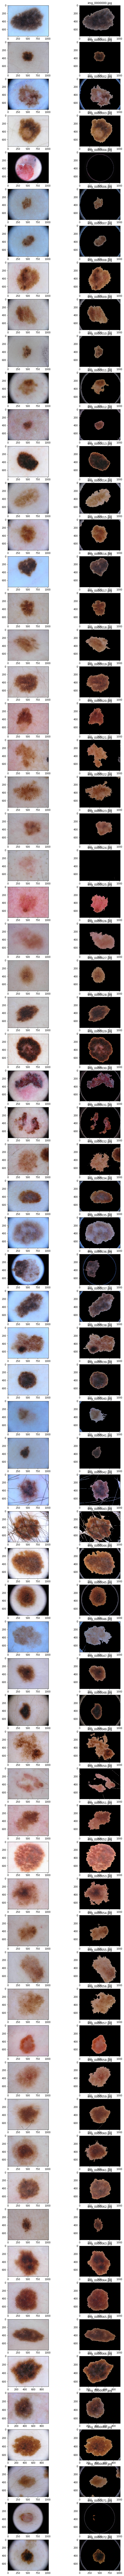

In [24]:
plt.figure(figsize=(10,200))
i = 0
nb_img = 70
for img, path in zip(imgs[:nb_img], file_paths[:nb_img]):
    plt.subplot(nb_img,2,2*i + 1)
    plt.imshow(img)
    removed = get_segmentation(img.copy())
    plt.subplot(nb_img,2,2*i + 2)
    plt.title(path)
    plt.imshow(removed)
    i+=1






